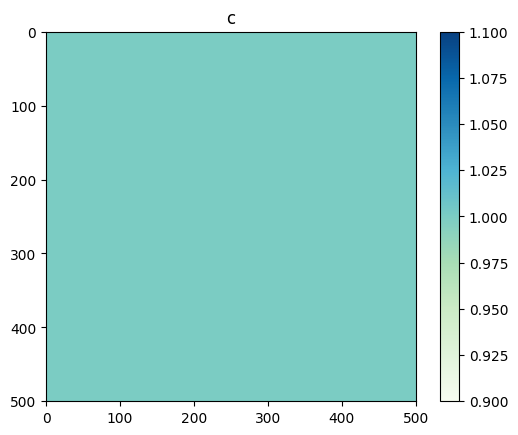

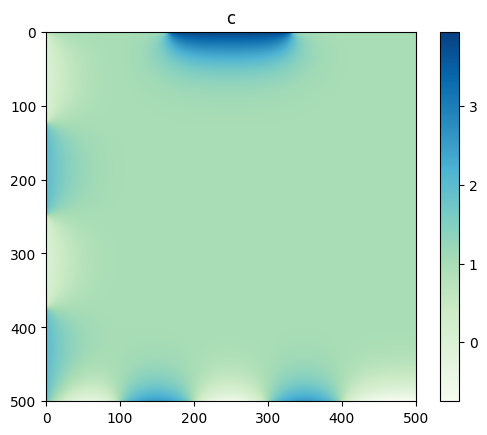

In [2]:
import pyphasefield.Engines as engines

sim = engines.Diffusion(dimensions=[500, 500])

#initialize non-array parameters
sim.set_framework("CPU_SERIAL") #"CPU_SERIAL", "GPU_SERIAL" (GPU_SERIAL requires numba)
sim.set_dx(1.)
sim.set_dt(0.2)
sim.set_save_path("data/boundary_conditions_test")
sim.set_autosave_flag(False)
sim.set_boundary_conditions([["DIRICHLET", "NEUMANN"], ["DIRICHLET", "NEUMANN"]])

data = {
    "D":1.
}
sim.set_user_data(data)

#initialize simulation arrays, all parameter changes should be BEFORE this point!
sim.initialize_engine()

#change array data here, for custom simulations

#set the field values manually using numpy slicing, setting it to one everywhere
sim.fields[0].data[:] = 1.

#set the boundary fields!
#X-axis Dirichlet, commented lines are default behavior
#sim.boundary_fields[0].data[:125, 0] = 0.
sim.boundary_fields[0].data[125:250, 0] = 2.
#sim.boundary_fields[0].data[250:375, 0] = 0.
sim.boundary_fields[0].data[375:, 0] = 2.

#Y-axis Dirichlet
sim.boundary_fields[0].data[0, :166] = 1.
sim.boundary_fields[0].data[0, 333:] = 1.
sim.boundary_fields[0].data[0, 166:333] = 4.

#Neumann X-axis has no change, equivalent to the bottom line
#sim.boundary_fields[0].data[:, -1] = 0.

#Neumann Y-axis
sim.boundary_fields[0].data[-1, :100] = 0.05
sim.boundary_fields[0].data[-1, 100:200] = -0.05
sim.boundary_fields[0].data[-1, 200:300] = 0.05
sim.boundary_fields[0].data[-1, 300:400] = -0.05
sim.boundary_fields[0].data[-1, 400:] = 0.05

#initial conditions
sim.plot_simulation()

#run simulation
sim.simulate(5000)

#final conditions
sim.plot_simulation()